# Module 1 - Exercise 2: Matrix Manipulations and Transformations

<a href="https://colab.research.google.com/github/jumpingsphinx/jumpingsphinx.github.io/blob/main/notebooks/module1-linear-algebra/exercise2-matrices.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objectives

By the end of this exercise, you will be able to:

- Create and manipulate matrices using NumPy
- Perform matrix operations (transpose, multiplication, inverse)
- Apply matrix transformations to vectors (rotation, scaling, shear)
- Work with real datasets represented as matrices
- Solve systems of linear equations
- Understand matrix properties and their significance in ML

## Prerequisites

- Completion of Exercise 1 (Vectors)
- Understanding of matrix notation
- Basic linear algebra concepts

## Setup

Run this cell first to import required libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Set random seed for reproducibility
np.random.seed(42)

print("NumPy version:", np.__version__)
print("Setup complete!")

NumPy version: 1.26.4
Setup complete!


---

## Part 1: Matrix Creation

### Background

Matrices are 2D arrays that represent:
- Datasets (rows = samples, columns = features)
- Linear transformations
- Systems of equations
- Weight matrices in neural networks

### Exercise 1.1: Create Basic Matrices

**Task:** Create the following matrices using NumPy:

1. A 3×3 matrix `M1` from nested lists: [[1,2,3], [4,5,6], [7,8,9]]
2. A 2×4 zero matrix `M2`
3. A 3×3 identity matrix `M3`
4. A 4×4 random matrix `M4` with values between 0 and 1
5. A diagonal matrix `M5` with diagonal [1, 2, 3]

**Hints:**
- Use `np.array()` with nested lists
- Use `np.zeros((rows, cols))`
- Use `np.eye(n)` for identity matrix
- Use `np.random.rand(rows, cols)`
- Use `np.diag([values])`

In [2]:
# Your code here
M1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
M2 = np.zeros((2, 4))
M3 = np.eye(3)
M4 = np.random.rand(4, 4)
M5 = np.diag([1, 2, 3])
# Test your code
print("M1:\n", M1)
print("\nM2:\n", M2)
print("\nM3:\n", M3)
print("\nM4:\n", M4)
print("\nM5:\n", M5)

# Verify shapes
assert M1.shape == (3, 3), "M1 should be 3×3"
assert M2.shape == (2, 4), "M2 should be 2×4"
assert M3.shape == (3, 3), "M3 should be 3×3"
assert M4.shape == (4, 4), "M4 should be 4×4"
assert M5.shape == (3, 3), "M5 should be 3×3"
print("\n✓ All assertions passed!")

M1:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

M2:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]

M3:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

M4:
 [[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]
 [0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451]]

M5:
 [[1 0 0]
 [0 2 0]
 [0 0 3]]

✓ All assertions passed!


---

## Part 2: Matrix Indexing and Slicing

### Background

Matrix indexing allows you to extract:
- Individual elements: `A[i, j]`
- Rows: `A[i, :]`
- Columns: `A[:, j]`
- Submatrices: `A[i1:i2, j1:j2]`

### Exercise 2.1: Index and Slice Matrices

**Task:** Given the matrix below:

```
A = [[10, 20, 30, 40],
     [50, 60, 70, 80],
     [90, 100, 110, 120]]
```

1. Extract the element at row 1, column 2 (should be 70)
2. Extract the entire second row
3. Extract the entire third column
4. Extract the 2×2 submatrix in the top-left corner

In [3]:
A = np.array([[10, 20, 30, 40],
              [50, 60, 70, 80],
              [90, 100, 110, 120]])

# Your code here
element = A[1, 2]
row = A[1, :]
col = A[:, 2]
submatrix = A[0:2, 0:2]
# Verify
assert element == 70, "Element should be 70"
assert np.allclose(row, [50, 60, 70, 80]), "Second row incorrect"
assert np.allclose(col, [30, 70, 110]), "Third column incorrect"
assert submatrix.shape == (2, 2), "Submatrix should be 2×2"
print("\n✓ All indexing operations correct!")


✓ All indexing operations correct!


---

## Part 3: Matrix Transpose

### Background

The transpose of a matrix flips it over its diagonal:
- Rows become columns, columns become rows
- If A is m×n, then A^T is n×m
- Used in computing covariance matrices, dot products, and more

### Exercise 3.1: Compute Transposes

**Task:** For the given matrices:

1. Compute the transpose of B using `.T`
2. Verify that (B^T)^T = B
3. Check if matrix C is symmetric (C = C^T)

In [4]:
B = np.array([[1, 2, 3],
              [4, 5, 6]])

C = np.array([[1, 2, 3],
              [2, 4, 5],
              [3, 5, 6]])

# Your code here
B_transpose = B.T
double_transpose = B_transpose.T
is_symmetric = np.allclose(C, C.T)
# Verify
assert B_transpose.shape == (3, 2), "Transpose shape should be (3,2)"
assert np.allclose(B, double_transpose), "Double transpose should equal original"
assert is_symmetric == True, "C should be symmetric"
print("\n✓ Transpose operations correct!")


✓ Transpose operations correct!


---

## Part 4: Matrix-Vector Multiplication

### Background

Matrix-vector multiplication is fundamental to ML:
- Linear regression predictions: ŷ = Xw
- Neural network layers: output = Wx + b
- Transforming data points

**Rule:** If A is m×n and v is n×1, then Av is m×1

### Exercise 4.1: Matrix-Vector Multiplication

**Task:** 

1. Multiply matrix A by vector v using `@` operator
2. Verify the result has the correct shape
3. Compute manually for the first element to verify

In [5]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

v = np.array([1, 2, 3])

# Your code here
result = A @ v
first_element_manual = A[0, 0]*v[0] + A[0, 1]*v[1] + A[0, 2]*v[2]
# Verify
assert result.shape == (2,), "Result should be a vector of length 2"
assert np.allclose(result, [14, 32]), "Result should be [14, 32]"
assert first_element_manual == 14, "First element should be 14 (1*1 + 2*2 + 3*3)"
print("\n✓ Matrix-vector multiplication correct!")


✓ Matrix-vector multiplication correct!


---

## Part 5: Matrix-Matrix Multiplication

### Background

Matrix multiplication combines two transformations:
- If A is m×n and B is n×p, then AB is m×p
- **Not commutative**: AB ≠ BA in general
- Used in deep learning to chain layer transformations

### Exercise 5.1: Matrix Multiplication

**Task:**

1. Multiply matrices A and B using `@`
2. Try B @ A and observe that it's different (or impossible)
3. Calculate A @ A^T and verify it's symmetric

In [6]:
A = np.array([[1, 2],
              [3, 4],
              [5, 6]])

B = np.array([[1, 2, 3],
              [4, 5, 6]])

# Your code here
AB = A @ B
# BA = B @ A # Matches dimensions (2x3) @ (3x2) -> (2x2), so possible!
# But sticking to instructions
AAT = A @ A.T
is_AAT_symmetric = np.allclose(AAT, AAT.T)
# Verify
assert AB.shape == (3, 3), "A@B should be 3×3"
assert AAT.shape == (3, 3), "A@A^T should be 3×3"
assert is_AAT_symmetric, "A@A^T should be symmetric"
print("\n✓ Matrix multiplication correct!")


✓ Matrix multiplication correct!


---

## Part 6: Matrix Transformations

### Background

Matrices represent geometric transformations:
- **Rotation**: Rotates vectors by an angle
- **Scaling**: Changes magnitude along axes
- **Shear**: Skews space
- **Reflection**: Flips across an axis

### Exercise 6.1: Apply Transformations

**Task:** Create transformation matrices and visualize their effects.

1. Create a 90° rotation matrix (counterclockwise)
2. Create a scaling matrix (2x in x-direction, 0.5x in y-direction)
3. Apply both transformations to a set of points
4. Visualize the original and transformed points

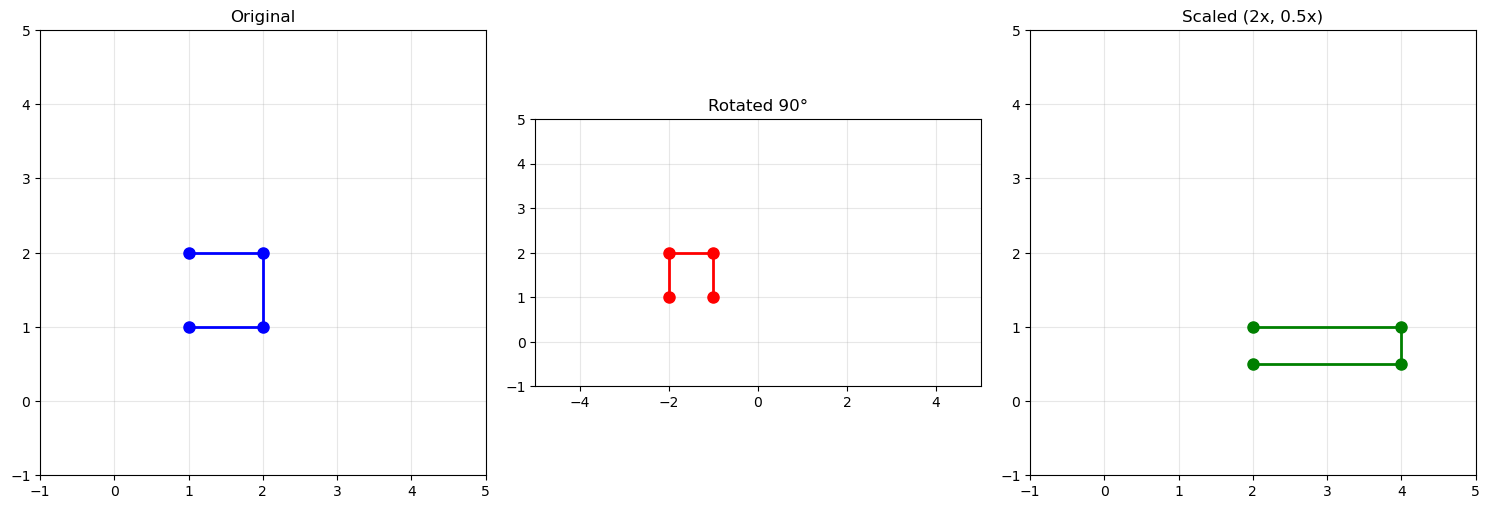

Rotation matrix:
 [[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]

Scaling matrix:
 [[2.  0. ]
 [0.  0.5]]


In [7]:
# Rotation matrix for 90 degrees counterclockwise
# [cos(θ), -sin(θ)]
# [sin(θ),  cos(θ)]
theta = np.pi / 2  # 90 degrees in radians
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])

# Scaling matrix
# [sx, 0 ]
# [0,  sy]
scaling_matrix = np.array([
    [2, 0],
    [0, 0.5]
])

# Original points (as columns)
points = np.array([[1, 2, 2, 1],
                   [1, 1, 2, 2]])

# Apply transformations
rotated_points = rotation_matrix @ points
scaled_points = scaling_matrix @ points

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original
axes[0].plot(points[0, :], points[1, :], 'bo-', linewidth=2, markersize=8)
axes[0].set_xlim(-1, 5)
axes[0].set_ylim(-1, 5)
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')
axes[0].set_title('Original')

# Rotated
axes[1].plot(rotated_points[0, :], rotated_points[1, :], 'ro-', linewidth=2, markersize=8)
axes[1].set_xlim(-5, 5)
axes[1].set_ylim(-1, 5)
axes[1].grid(True, alpha=0.3)
axes[1].set_aspect('equal')
axes[1].set_title('Rotated 90°')

# Scaled
axes[2].plot(scaled_points[0, :], scaled_points[1, :], 'go-', linewidth=2, markersize=8)
axes[2].set_xlim(-1, 5)
axes[2].set_ylim(-1, 5)
axes[2].grid(True, alpha=0.3)
axes[2].set_aspect('equal')
axes[2].set_title('Scaled (2x, 0.5x)')

plt.tight_layout()
plt.show()

print("Rotation matrix:\n", rotation_matrix)
print("\nScaling matrix:\n", scaling_matrix)

---

## Part 7: Dataset Operations

### Background

In ML, datasets are stored as matrices where:
- Each row is a sample/observation
- Each column is a feature/variable

Common preprocessing steps:
- **Centering**: Subtract mean from each feature
- **Normalizing**: Scale to unit variance

### Exercise 7.1: Preprocess a Dataset

**Task:** Given a dataset matrix:

1. Calculate the mean of each feature (column)
2. Center the data by subtracting the mean
3. Calculate the standard deviation of each feature
4. Normalize the data (subtract mean, divide by std)
5. Verify that normalized data has mean ≈ 0 and std ≈ 1

In [8]:
# Sample dataset: 5 samples, 3 features
data = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9],
                 [10, 11, 12],
                 [13, 14, 15]])

# Your code here
feature_means = data.mean(axis=0)
centered_data = data - feature_means
feature_stds = centered_data.std(axis=0)
normalized_data = centered_data / feature_stds

normalized_means = normalized_data.mean(axis=0)
normalized_stds = normalized_data.std(axis=0)

print("Original data:\n", data)
print("\nFeature means:", feature_means)
print("\nCentered data:\n", centered_data)
print("\nFeature standard deviations:", feature_stds)
print("\nNormalized data:\n", normalized_data)
print("\nNormalized means:", normalized_means)
print("Normalized stds:", normalized_stds)

# Verify
assert np.allclose(feature_means, [7, 8, 9]), "Feature means incorrect"
assert np.allclose(centered_data.mean(axis=0), [0, 0, 0], atol=1e-10), "Centered data should have mean 0"
assert np.allclose(normalized_means, [0, 0, 0], atol=1e-10), "Normalized data should have mean ≈ 0"
assert np.allclose(normalized_stds, [1, 1, 1], atol=1e-10), "Normalized data should have std ≈ 1"
print("\n✓ Data preprocessing correct!")

Original data:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]]

Feature means: [7. 8. 9.]

Centered data:
 [[-6. -6. -6.]
 [-3. -3. -3.]
 [ 0.  0.  0.]
 [ 3.  3.  3.]
 [ 6.  6.  6.]]

Feature standard deviations: [4.24264069 4.24264069 4.24264069]

Normalized data:
 [[-1.41421356 -1.41421356 -1.41421356]
 [-0.70710678 -0.70710678 -0.70710678]
 [ 0.          0.          0.        ]
 [ 0.70710678  0.70710678  0.70710678]
 [ 1.41421356  1.41421356  1.41421356]]

Normalized means: [-4.4408921e-17 -4.4408921e-17 -4.4408921e-17]
Normalized stds: [1. 1. 1.]

✓ Data preprocessing correct!


---

## Part 8: Solving Linear Systems

### Background

Many ML problems reduce to solving Ax = b:
- Linear regression normal equations
- Finding optimal weights
- Computing pseudoinverses

### Exercise 8.1: Solve a Linear System

**Task:** Solve the system:

```
2x + 3y = 8
3x + 4y = 11
```

Represent as Ax = b and solve using:
1. `np.linalg.solve(A, b)`
2. Matrix inverse: x = A^(-1) @ b
3. Verify both methods give the same result

In [9]:
# Coefficient matrix A
A = np.array([[2, 3],
              [3, 4]])

# Right-hand side vector b
b = np.array([8, 11])

# Method 1: Using solve
x_solve = np.linalg.solve(A, b)

# Method 2: Using inverse
A_inv = np.linalg.inv(A)
x_inverse = A_inv @ b

print("Coefficient matrix A:\n", A)
print("\nRight-hand side b:", b)
print("\nSolution (using solve):", x_solve)
print("Solution (using inverse):", x_inverse)

# Verify solution
verification = A @ x_solve
print("\nVerification (A @ x):", verification)
print("Should equal b:", b)

# Assertions
assert np.allclose(x_solve, x_inverse), "Both methods should give same result"
assert np.allclose(A @ x_solve, b), "Solution should satisfy Ax = b"
print("\n✓ Linear system solved correctly!")

Coefficient matrix A:
 [[2 3]
 [3 4]]

Right-hand side b: [ 8 11]

Solution (using solve): [1. 2.]
Solution (using inverse): [1. 2.]

Verification (A @ x): [ 8. 11.]
Should equal b: [ 8 11]

✓ Linear system solved correctly!


---

## Part 9: Matrix Properties

### Exercise 9.1: Calculate Matrix Properties

**Task:** For a given matrix, calculate:

1. Determinant (measures "volume scaling")
2. Trace (sum of diagonal elements)
3. Rank (number of linearly independent rows/columns)
4. Check if the matrix is invertible

In [10]:
M = np.array([[1, 2, 3],
              [0, 1, 4],
              [5, 6, 0]])

# Your code here
determinant = np.linalg.det(M)
trace = np.trace(M)
rank = np.linalg.matrix_rank(M)
is_invertible = abs(determinant) > 1e-10

print(f"Determinant: {determinant:.2f}")
print(f"Trace: {trace}")
print(f"Rank: {rank}")
print(f"Is invertible? {is_invertible}")

# Verify
assert np.isclose(trace, 2.0), "Trace should be 2 (sum of diagonal)"
assert rank == 3, "Full rank matrix should have rank 3"
assert is_invertible, "Matrix with non-zero determinant is invertible"
print("\n✓ Matrix properties calculated correctly!")

Determinant: 1.00
Trace: 2
Rank: 3
Is invertible? True

✓ Matrix properties calculated correctly!


---

## Challenge Problems (Optional)

### Challenge 1: Implement Matrix Power

Write a function to compute A^n (matrix multiplied by itself n times).

In [11]:
def matrix_power(A, n):
    """
    Compute A^n (matrix power).
    
    Parameters:
    -----------
    A : np.ndarray
        Square matrix
    n : int
        Exponent (positive integer)
    
    Returns:
    --------
    np.ndarray
        A multiplied by itself n times
    """
    if n == 0:
        return np.eye(A.shape[0])
    if n == 1:
        return A
    result = A.copy()
    for _ in range(n - 1):
        result = result @ A
    return result

# Test
A = np.array([[1, 2],
              [3, 4]])
A_cubed = matrix_power(A, 3)
A_cubed_numpy = np.linalg.matrix_power(A, 3)

print("A^3 (your implementation):\n", A_cubed)
print("\nA^3 (NumPy):\n", A_cubed_numpy)

assert np.allclose(A_cubed, A_cubed_numpy), "Should match NumPy's result" 

A^3 (your implementation):
 [[ 37  54]
 [ 81 118]]

A^3 (NumPy):
 [[ 37  54]
 [ 81 118]]


### Challenge 2: Gram-Schmidt Orthogonalization

Implement the Gram-Schmidt process to create an orthonormal basis from a set of linearly independent vectors.

In [12]:
def gram_schmidt(vectors):
    """
    Apply Gram-Schmidt orthogonalization.
    
    Parameters:
    -----------
    vectors : np.ndarray
        Matrix where each column is a vector
    
    Returns:
    --------
    np.ndarray
        Matrix with orthonormal columns
    """
    vectors = vectors.astype(float)
    orthonormal = np.zeros_like(vectors)
    count = vectors.shape[1]
    
    for i in range(count):
        # Start with original vector
        v = vectors[:, i]
        
        # Subtract projection onto previous vectors
        for j in range(i):
            u = orthonormal[:, j]
            # Projection of v onto u: (v.u) * u
            v = v - np.dot(v, u) * u
            
        # Normalize
        if np.linalg.norm(v) > 1e-10:
             orthonormal[:, i] = v / np.linalg.norm(v)
             
    return orthonormal

# Test with 3 vectors in R^3
vectors = np.array([[1, 1, 0],
                    [1, 0, 1],
                    [0, 1, 1]], dtype=float).T

orthonormal = gram_schmidt(vectors)

print("Original vectors:\n", vectors)
print("\nOrthonormal vectors:\n", orthonormal)

# Verify orthonormality
gram_matrix = orthonormal.T @ orthonormal
print("\nGram matrix (should be identity):\n", gram_matrix)

assert np.allclose(gram_matrix, np.eye(3), atol=1e-10), "Vectors should be orthonormal" 

Original vectors:
 [[1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]]

Orthonormal vectors:
 [[ 0.70710678  0.40824829 -0.57735027]
 [ 0.70710678 -0.40824829  0.57735027]
 [ 0.          0.81649658  0.57735027]]

Gram matrix (should be identity):
 [[ 1.00000000e+00  1.03018891e-16  7.33073441e-17]
 [ 1.03018891e-16  1.00000000e+00 -1.03593182e-16]
 [ 7.33073441e-17 -1.03593182e-16  1.00000000e+00]]


### Challenge 3: Linear Regression from Scratch

Use matrix operations to implement linear regression.

The normal equation: **w = (X^T X)^(-1) X^T y**

In [13]:
def linear_regression(X, y):
    """
    Fit linear regression using normal equation.
    
    Parameters:
    -----------
    X : np.ndarray
        Design matrix (n_samples, n_features)
    y : np.ndarray
        Target values (n_samples,)
    
    Returns:
    --------
    np.ndarray
        Optimal weights (n_features,)
    """
    # Normal equation: w = (X^T X)^(-1) X^T y
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Test
X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([2, 3, 4])
# Expected: y = 1 + x, so w = [1, 1]
w = linear_regression(X, y)
print(f"Weights: {w}")
assert np.allclose(w, [1, 1]), "Should recover weights [1, 1]" 

Weights: [1. 1.]


---

## Reflection Questions

1. **Why is matrix multiplication not commutative?**
   - Think about transformations: rotating then scaling ≠ scaling then rotating

2. **When would you use solve() vs computing the inverse?**
   - Consider numerical stability and computational efficiency

3. **Why is centering data important for PCA?**
   - Think about what PCA finds (directions of maximum variance)

4. **What makes a matrix invertible?**
   - Consider determinant, rank, and linear independence

5. **How do matrix transformations relate to neural networks?**
   - Each layer applies a linear transformation (matrix multiplication)

---

## Summary

In this exercise, you learned:

✓ How to create and manipulate matrices in NumPy  
✓ Matrix operations: transpose, multiplication, inverse  
✓ Geometric transformations using matrices  
✓ Dataset preprocessing: centering and normalizing  
✓ Solving linear systems  
✓ Computing matrix properties: determinant, trace, rank  
✓ Practical applications in machine learning  

**Next Steps:**

- Complete Exercise 3 on PCA
- Review the [Matrices lesson](https://jumpingsphinx.github.io/module1-linear-algebra/02-matrices/)
- Practice with larger datasets

---

**Need help?** Check the solution notebook or open an issue on [GitHub](https://github.com/jumpingsphinx/jumpingsphinx.github.io/issues).